In [18]:
import re
import matplotlib.pyplot as plt

# Loss Curve

In [24]:
# Read Data from log file
def parse_log(log_file_path):
    losses = []
    with open(log_file_path, 'r') as file:
        for line in file:
            match = re.search(r'Loss: ([0-9.]+)', line)
            if match:
                loss = float(match.group(1))
                losses.append(loss)
    return losses

# Path to the log file
path_NoSVD = 'logs/ResNet18_Cifar10_NoSVD_training'
path_k_0_1 = 'logs/ResNet18_Cifar10_SVD_training_k=0.1'
path_k_0_2 = 'logs/ResNet18_Cifar10_SVD_training_k=0.2'
path_k_0_5 = 'logs/ResNet18_Cifar10_SVD_training_k=0.5'
path_k_0_8 = 'logs/ResNet18_Cifar10_SVD_training_k=0.8'
path_k_1_0 = 'logs/ResNet18_Cifar10_SVD_training_k=1.0'

# Extract loss values from log file
losses_NoSVD = parse_log(path_NoSVD)
losses_k_0_1 = parse_log(path_k_0_1)
losses_k_0_2 = parse_log(path_k_0_2)
losses_k_0_5 = parse_log(path_k_0_5)
losses_k_0_8 = parse_log(path_k_0_8)
losses_k_1_0 = parse_log(path_k_1_0)


# Function to compute average loss per epoch
def compute_avg_loss_per_epoch(losses, batches_per_epoch):
    avg_losses_per_epoch = []
    for i in range(0, len(losses)-1, batches_per_epoch):
        epoch_losses = losses[i:i + batches_per_epoch]
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        avg_losses_per_epoch.append(avg_loss)
    return avg_losses_per_epoch

# Assuming each epoch has 782 batches
batches_per_epoch = 782

# Compute average loss per epoch
avg_losses_NoSVD = compute_avg_loss_per_epoch(losses_NoSVD, batches_per_epoch)
avg_losses_k_0_5 = compute_avg_loss_per_epoch(losses_k_0_5, batches_per_epoch)
avg_losses_k_1_0 = compute_avg_loss_per_epoch(losses_k_1_0, batches_per_epoch)


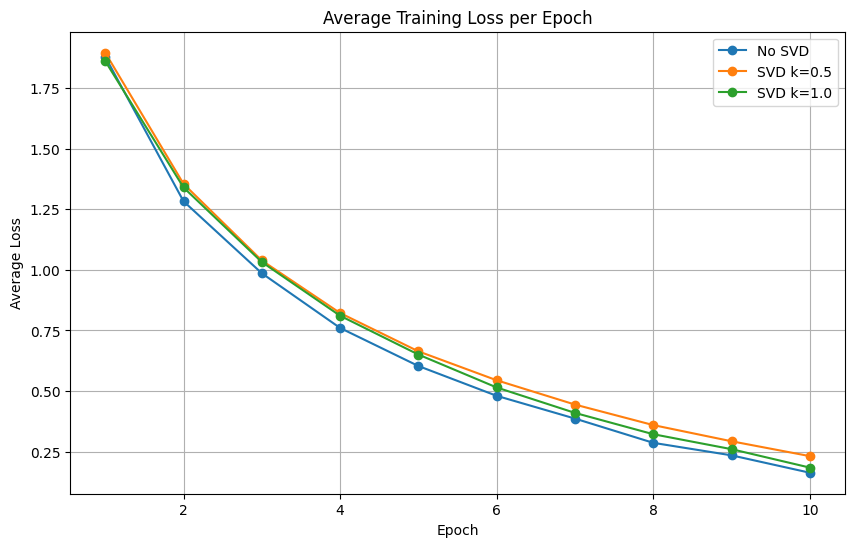

In [26]:
# Plot the average loss per epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_losses_NoSVD) + 1), avg_losses_NoSVD, label='No SVD', marker='o')
plt.plot(range(1, len(avg_losses_k_0_5) + 1), avg_losses_k_0_5, label='SVD with TopK=0.5', marker='o')
plt.plot(range(1, len(avg_losses_k_1_0) + 1), avg_losses_k_1_0, label='SVD with TopK=1.0', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet18 on Cifar10')
plt.legend()
plt.grid(True)
plt.savefig('plots/ResNet18_Cifar10.pdf')
plt.show()

# Error Plot

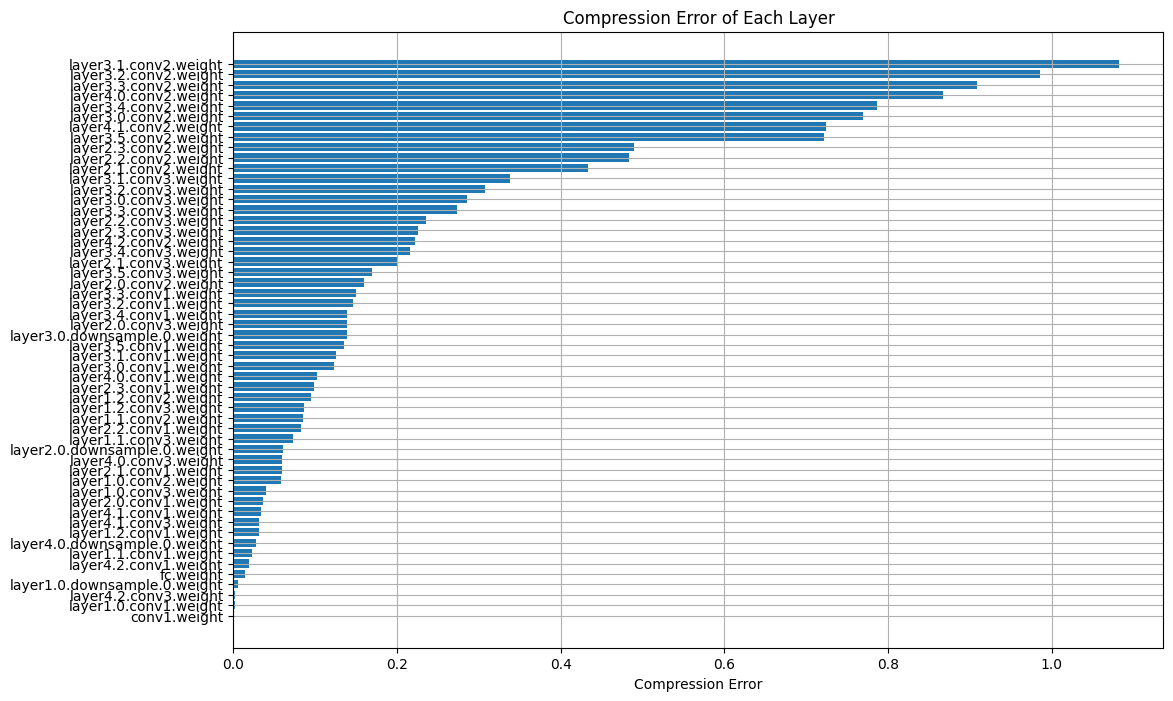

In [32]:
# Function to extract layer names and errors
def parse_compression_errors(log_data_path):
    layer_errors = {}
    with open(log_data_path, 'r') as file:
        for line in file:
            match = re.search(r'Layer: (.*?),.*?Error: ([0-9.e+-]+)', line)
            if match:
                layer_name = match.group(1)
                error = float(match.group(2))
                layer_errors[layer_name] = error
    return layer_errors

# Path to the log file
log_data = 'logs/ResNet18_Cifar10_SVD_training_k=0.5'


# Extract layer names and errors
layer_errors = parse_compression_errors(log_data)

# Sort layers by error for better visualization
sorted_layers = sorted(layer_errors.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
layers = [layer for layer, error in sorted_layers]
errors = [error for layer, error in sorted_layers]

# Plot the compression errors
plt.figure(figsize=(12, 8))
plt.barh(layers, errors)
plt.xlabel('Compression Error')
plt.title('Compression Error of Each Layer')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()